<a href="https://colab.research.google.com/github/PHYS-2030-Computational-Methods/assignment-10-dft-Naveeda28/blob/main/Assignment_10_DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naveeda Ali
<br>
Due date: Mar. 26, 2024, 11:59pm
<br>
PHYS 2030 W24


# <center><font color=#46769B>Homework assignment 10</font></center>

__Rubric (100 points total)__:

- Problem 1a - __25 points__

- Problem 1b - __25 points__

- Problem 2a - __25 points__

- Problem 2b - __25 points__

</font>

## <font color=#46769B>Introduction: Discrete Fourier Transform (DFT)</font>

The goals of this exercise are:

- Learn basics of DFT and the power spectrum

- Gain familiarity with `scipy` functions for DFT

Required reading:

- *Lesson 10: Fourier Series

- *Lesson 11: Discrete Fourier Transform

## <font color=#46769B>Problem 1: Energy consumption in the US</font>

In this problem, we will introduce the idea of analyzing data by working in the frequency domain. That is, we have some data for a quantity that changes in time and we want to look for trends in the data over different time scales.

Here our data will be the [total US energy consumption for the year 2021](https://www.eia.gov/), from Jan. 1 to Dec. 31. The data itself is a list of $24\times 365$ hourly entries for the energy consumption in each hour for the year 2021. We will analyze it using Discrete Fourier Transform.

First, let's load data and plot it to see what it looks like. Run this cell:

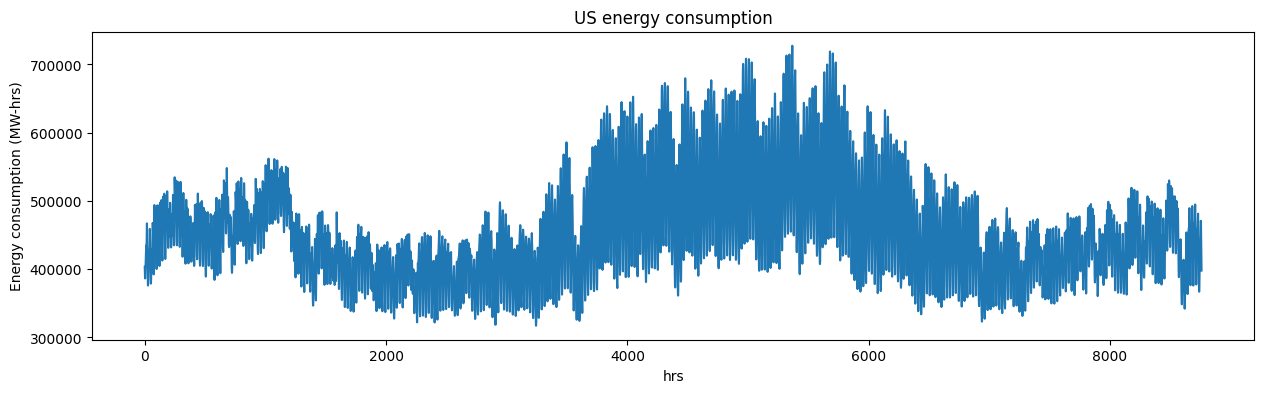

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fn = np.loadtxt("https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/data/US_electricity_data_2021.csv")

tn = range(len(fn))

plt.figure(figsize=(15,4))
plt.plot(tn,fn)

plt.xlabel('hrs')
plt.ylabel('Energy consumption (MW-hrs)')
plt.title('US energy consumption')
plt.show()

The energy consumption is our function $f(t)$, for which we only have discrete data $f_n$ at hourly times $t_n$. That is, the time between samples is $h = 1 \; {\rm hr}$ and the sampling frequency is $\nu_s = 1/h = 1 \; {\rm hr}^{-1}$. The dataset spans $T = 24 \times 365 = 8760$ hours.

The data is complicated, but at the same time there is structure, with variation occuring over particular time scales. The goal here is to explore how we can use DFT to understand this data. What information is in this data and how can we extract it?

### <font color=#46769B>Part (a):</font>

Your tasks are as follows:

- Calculate the Fourier coefficients $c_k$ by taking the DFT of the $f_n$ values. Before you take the DFT, subtract off the mean value of $f_n$ because we are only interested in how $f_n$ varies in time.

- Compute the Fourier frequencies $\nu_k$. Use the convention where positive frequencies $\nu_k$ are replaced by negative frequencies $\nu_{k-N}$ for $k \ge N/2$, as described in the Lecture Notes (convention 2, therein).

- Plot the power spectrum $P_k$ as a function of $\nu_k$. Use a log scale on the $y$-axis, and label your axes.

- Determine the frequency $\nu_k$ and corresponding period $1/\nu_k$ that has the largest power in the data. This means that people in the US are varying their energy usage over that characteristic time scale $1/\nu_k$. Does this make sense? (Write a comment.)

For these tasks, you are meant to write your own code to do these computations, not use existing functions from `scipy` (or another package) which is the task for part (b).

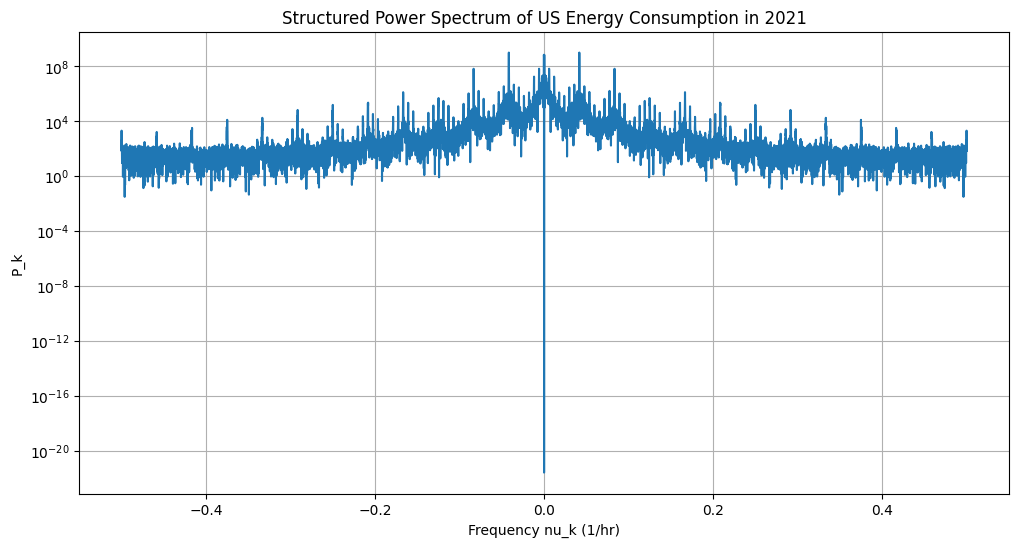

The frequency and period that has the largest power in the dataset is 0.041666666666666664 1/hr and 24.0 hr.


In [6]:
# Your code for Part (a) here
import numpy as np
import matplotlib.pyplot as plt

#Define DFT function
def DFT(fn):
    # Calculate N automatically from number of samples
    N = len(fn)
    # Initialize empty array for Fourier coefficients
    ck = np.zeros(N, dtype='complex')
    #Define values n = [0,1,2,...,N-1]
    n = np.arange(N)

    #Calculate coefficients ck by looping through k
    for k in range(N):
        ck[k] = 1/N * np.sum(fn * np.exp(-2j * np.pi * k * n / N))

    return ck

#Load the actual data for US energy consumption in 2021
url = "https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/data/US_electricity_data_2021.csv"
fn = np.loadtxt(url)

#Subtract mean of fn from fn values
fn_adjusted = fn - np.mean(fn)

#Compute the DFT for the adjusted data
ck = DFT(fn_adjusted)

# Calculate the power spectrum
Pk = np.abs(ck)**2

# Calculate Fourier frequencies according to the specified convention
N = len(fn_adjusted)
h = 1
nu_s = 1/h
k = np.arange(N)
# Fourier frequencies (convention 2)
nu_k = np.where(k < N/2, k * nu_s / N, (k - N) * nu_s / N)

#Sort Pk by increasing nu_k for visualization
sort = np.argsort(nu_k)
nu_k_sorted = nu_k[sort]
Pk_sorted = Pk[sort]

#Plotting the power spectrum
plt.figure(figsize=(12, 6))
plt.plot(nu_k_sorted, Pk_sorted)
plt.yscale('log')
plt.xlabel('Frequency nu_k (1/hr)')
plt.ylabel('P_k')
plt.title('Structured Power Spectrum of US Energy Consumption in 2021')
plt.grid(True)
plt.show()

#Find index with highest power, then find corresponding frequency and perio
max_index = np.argmax(Pk)
max_power_freq = nu_k[max_index]
max_power_period = 1/(max_power_freq)

#The makes sense because each day has 24 hours so the period matches
print("The frequency and period that has the largest power in the dataset is",max_power_freq,"1/hr and",max_power_period,"hr.")


### <font color=#46769B>Part (b):</font>

Repeat the tasks of Part (a) using built-in functions in `scipy`, as follows:

- Calculate the Fourier coefficients $c_k$ using the built-in function `scipy.fft.fft()`.

- Calculate the Fourier frequencies $\nu_k$ using the built-in function `scipy.fft.fftfreq()`.

- Calculate the power spectrum $P_k$ using `scipy.signal.periodogram()` and plot $P_k$ vs $\nu_k$, as in Part (a).

- Check that $c_k$, $\nu_k$, $P_k$ are the same as you computed in Part (a) using `numpy.allclose()` to compare your results.

Hint: Further information about these functions are found in the Lecture Notes.




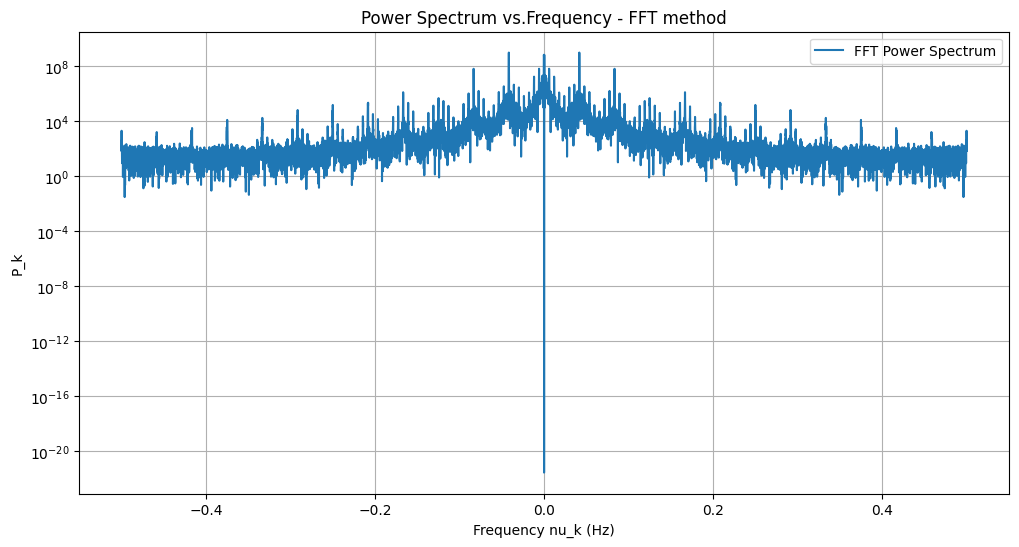

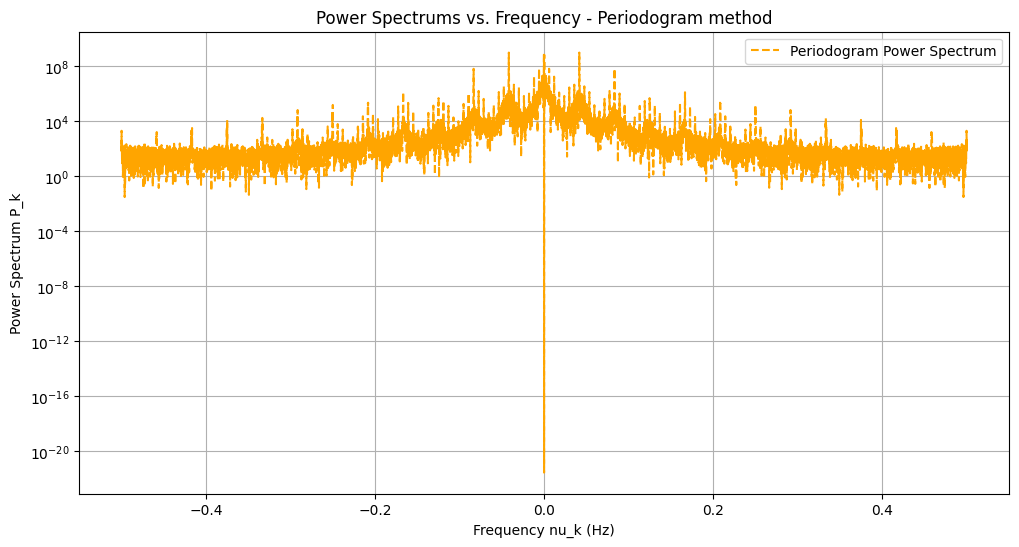

(True, True, True)

In [7]:
# Your code for Part (b) here
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, signal

#Calculate the Fourier coefficients
ck_scipy = fft.fft(fn - np.mean(fn), norm='forward')

#Calculate the Fourier frequencies
nu_k_scipy = fft.fftfreq(N, d=h)

#Calculate the power spectrum using scipy's periodogram function
nu_k_periodogram, Pk_periodogram = signal.periodogram(fn, fs=nu_s, return_onesided=False, scaling='spectrum')

#Sorting for FFT method for plotting
sort_scipy = np.argsort(nu_k_scipy)
nu_k_sorted_scipy = nu_k_scipy[sort_scipy]
Pk_sorted_scipy = np.abs(ck_scipy[sort_scipy])**2

#Sorting periodogram method for plotting
sort_periodogram = np.argsort(nu_k_periodogram)
nu_k_sorted_periodogram = nu_k_periodogram[sort_periodogram]
Pk_sorted_periodogram = Pk_periodogram[sort_periodogram]

#Check that ck, nu_k, Pk are the same as computed in Part (a)
are_ck_close = np.allclose(ck, ck_scipy)
are_nu_k_close = np.allclose(nu_k_sorted, nu_k_sorted_scipy)
are_Pk_close = np.allclose(Pk_sorted, Pk_sorted_periodogram)

#Plot power spectrum from scipy's fft functions
plt.figure(figsize=(12, 6))
plt.plot(nu_k_sorted_scipy, Pk_sorted_scipy, label='FFT Power Spectrum')
plt.yscale('log')
plt.xlabel('Frequency nu_k (Hz)')
plt.ylabel('P_k')
plt.title('Power Spectrum vs.Frequency - FFT method')
plt.legend()
plt.grid(True)
plt.show()

#Plot power spectrum from scipy's periodogram function
plt.figure(figsize=(12, 6))
plt.plot(nu_k_sorted_periodogram, Pk_sorted_periodogram, color='orange', label='Periodogram Power Spectrum', linestyle='--')
plt.yscale('log')
plt.xlabel('Frequency nu_k (Hz)')
plt.ylabel('Power Spectrum P_k')
plt.title('Power Spectrums vs. Frequency - Periodogram method')
plt.legend()
plt.grid(True)
plt.show()

#They should all be true, meaning they match the value we calculated in part a)
are_ck_close, are_nu_k_close, are_Pk_close


## <font color=#46769B>Problem 2: Fast Fourier Transform</font>

### <font color=#46769B>Introduction</font>

DFT forms the basis of signal processing and therefore it is of great interest to have as efficient an algorithm as possible to calculate the Fourier coefficients. The code described in the lecture notes calculates the Fourier coefficients $c_k$ according to the formula

$$c_k = \frac{1}{N} \sum_{n=0}^{N-1} f_n e^{-2\pi i k n/N} \, . \quad (1)$$

Computing each $c_k$ involves $\mathcal{O}(N)$ mathematical operations: $N$ multiplications of each $f_n$ value by an appropriate phase factor, and then summing up all $N$ terms. Then, we have $N$ coefficients $c_k$ to calculate, so we need to repeat all these operations $N$ times. So, it seems clear that we have an algorithm that is $\mathcal{O}(N^2)$. That is, the time to perform the DFT on our samples grows with the number of samples as $N^2$. If we have twice as many samples, our computation time is longer by a factor of 4. For large datasets, which we will consider later in the course, it becomes too computationally intensive to perform the DFT using a "brute force" algorithm that is $\mathcal{O}(N^2)$.

Fortunately, there is an algorithm that performs better, known as the __Fast Fourier Transform (FFT)__. The FFT is just an algorithm for calculating the Fourier coefficients obtained by DFT, which exploits the periodicity of the Fourier coefficients. Credit for the FFT is usual given to Cooley and Tukey, but their work is predated by others. Further reading can be found [here](https://en.wikipedia.org/wiki/Fast_Fourier_transform). Due to its great practical importance, FFT is regarded as one of the [top algorithms of all time](https://ieeexplore.ieee.org/document/814652).

The basic idea of FFT is as follows. Assuming $N$ is divisible by 2, we can divide our samples $f_n$ into two subsamples, one where $n$ is even and one where $n$ is odd. We will call these $g_m$ and $h_m$, respectively, where we have a new integer $m$ that goes from $0, ..., M$ where $M = \tfrac{N}{2}$.

$$g_m = f_{2m} \quad ({\rm even} \; n \; {\rm values})$$
$$h_m = f_{2m+1} \quad ({\rm odd} \; n \; {\rm values})$$

We can accomplish this in code by
```py
gm = fn[::2]
hm = fn[1::2]
```
using the `start:stop:skip` syntax for array slicing: `::2` means take every other entry starting at `0` and `1::2` means take every other entry starting at `1`.

Next, we rewrite Eq. (1) as follows:

$$c_k = \frac{1}{N} \sum_m^{M-1} \left( g_m e^{-2\pi i k (2m)/N} + h_m e^{-2\pi i k (2m+1)/N} \right)
= \frac{1}{2} \frac{1}{M} \sum_{m=0}^M \left( g_m e^{-2\pi i k m/M}\right)  + e^{-2\pi i k/N} \frac{1}{2} \frac{1}{M} \sum_{m=0}^M \left( h_m   e^{-2\pi i k m/M} \right)$$

The two sums are nothing more than the DFTs of $g_m$ and $h_m$. That is, we have reduced our task of taking the DFT of $N$ samples to that of taking two DFTs, each of $M = N/2$ samples. This is a factor of two improvement in the calculation time since $2 \times \mathcal{O}(M^2) = \frac{1}{2} \times \mathcal{O}(N^2)$. Let us denote

$$G_k = \frac{1}{M}  \sum_m^{M-1} g_m \, e^{-2\pi i k m/M}$$
$$H_k = \frac{1}{M}  \sum_m^{M-1} h_m \, e^{-2\pi i k m/M}$$

as the Fourier coefficients corresponding to $g_m, h_m$ respectively. Then

$$c_k = \frac{1}{2} \left( G_k + e^{-2\pi i k/M} H_k \right) \qquad (2)$$

Lastly, we can exploit the periodicity in our subsamples, $G_k = G_{k+M}$ and $H_{k} = H_{k+M}$. That is, we can calculate $c_k$ for $0 \le k < M$ as in Eq. (2), and for $M \le k < N$, we can reuse the same Fourier coefficients again to get $c_k$ for free. For $k > M$, using periodicity, we have

$$c_{k} = \frac{1}{2} \left( G_k + e^{-2\pi i k/N} H_k \right) = \frac{1}{2} \left( G_{k-M} + e^{-2\pi i k/N} H_{k-M} \right) \, .$$

We can rewrite this further as

$$c_{k+M} = \frac{1}{2} \left( G_k - e^{-2\pi i k/N} H_k \right) \qquad (3) $$

To implement this in Python, we would calculate Fourier coefficients $G_k$ and $H_k$, and then the $c_k$ are calculated using Eqs. (2) and (3) as

```py
k = np.arange(M)
factor = np.exp(-2j*np.pi*k/N)
ck[:M] = 0.5 * (Gk + factor * Hk)
ck[M:] = 0.5 * (Gk - factor * Hk)
```

Finally, how do we calculate the Fourier coefficients of the subsamples, $G_k$ and $H_k$? If $M$ is divisible by two, we can use the same trick again! That is, we divide our subsamples $g_m, h_m$ into two *sub*subsamples, etc. That is, we need to define our FFT algorithm to work *recursively*.

At some point, this ceases to work if we have to take the DFT of a number of samples that is not divisible by 2. In that case, we stop the recursion and use the brute force method. The recursive step would look like this:

```py
def FFT(fn):
    N = len(fn)
    if (N % 2) == 0:
        # FFT steps
        gm = fn[::2]
        hm = fn[1::2]
        Gk = FFT(gm)
        Hk = FFT(hm)
        
        # other steps, as outlined above
        
    else:
        # Use brute force method, given in Lecture notes
        ck = DFT(fn)
        
    return ck
```

### <font color=#46769B>Part (a) </font>

Your task is to write a function `FFT(fn)` that implements the above logic into a function (using a `def` statement).

In [8]:
# Part (a)
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, signal

#Define DFT function
def DFT(fn):
    # Calculate N automatically from number of samples
    N = len(fn)
    # Initialize empty array for Fourier coefficients
    ck = np.zeros(N, dtype='complex')
    #Define values n = [0,1,2,...,N-1]
    n = np.arange(N)

    #Calculate coefficients ck by looping through k
    for k in range(N):
        ck[k] = 1/N * np.sum(fn * np.exp(-2j * np.pi * k * n / N))

    return ck

#Define FFT function
def FFT(fn):
    N = len(fn)
    if N % 2 == 0:
        # FFT steps for when N is divisible by 2
        gm = fn[::2]
        hm = fn[1::2]
        Gk = FFT(gm)
        Hk = FFT(hm)

        k = np.arange(N // 2)
        factor = np.exp(-2j * np.pi * k / N)

        ck = np.zeros(N, dtype='complex')
        ck[:N // 2] = Gk + factor * Hk
        ck[N // 2:] = Gk - factor * Hk
    else:
        #If N is not divisible by 2, use the DFT function
        ck = DFT(fn)

    return ck

### <font color=#46769B>Part (b) </font>

Here is a dataset to test your function: some [wolves howling](https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/Wolf_howls.ogg). Run the following cell to load this file and save the sound wave as a `numpy.array`, which will provide our samples $f_n$. Loading the sound file also yields the sampling rate, $h^{-1}$, which is inversely related to the step size $h$. With $h$, we can extract the sampling times $t_n$.



In [9]:
import urllib.request
import soundfile

path = "https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/Wolf_howls.ogg?raw=true"
tmp_file = urllib.request.urlretrieve(path)[0]
data, sample_rate = soundfile.read(tmp_file)

fn = data[:,0]
N = len(fn)
tn = np.array(range(N))/sample_rate

Let's plot the sound wave so we can see what we are dealing with. The goal is to extract what frequencies (musical notes) the wolves are howling.

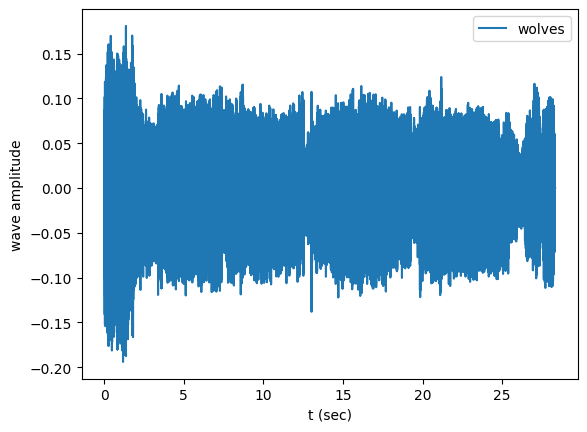

In [10]:
plt.plot(tn,fn,label='wolves')
plt.xlabel('t (sec)')
plt.ylabel('wave amplitude')
plt.legend()
plt.show()

Now your tasks are as follows:

- Take a subset of the samples $f_n$ consisting of $N=16384$ elements (you can pick any subset you like, e.g., the first 16384 elements). This number of samples corresponds to an approximately 3 second interval of the full sound wave.

- Calculate the Fourier coefficients $c_k$ for the 16384 samples using your `FFT()` function. (This number was chosen as one that is divisible by many factors of 2.)

- Calculate the same Fourier coefficients $c_k$ using the brute force method. (You should find that your FFT algorithm is a lot faster than the brute force method.)

- Verify both sets of Fourier coeffients are equal by performing `numpy.allclose()`.

- Plot the power spectrum of your samples. Include a label for the $x$-axis in your plot, set `plt.xscale('log')` and `plt.xlim([100,2000])`. Note that the sampling frequency is in units of Hz = 1/second, so your frequencies will have units of Hertz. For reference, [here](https://en.wikipedia.org/wiki/A440_(pitch_standard)) is ${\rm A440}$ which is a standard musical tuning pitch.

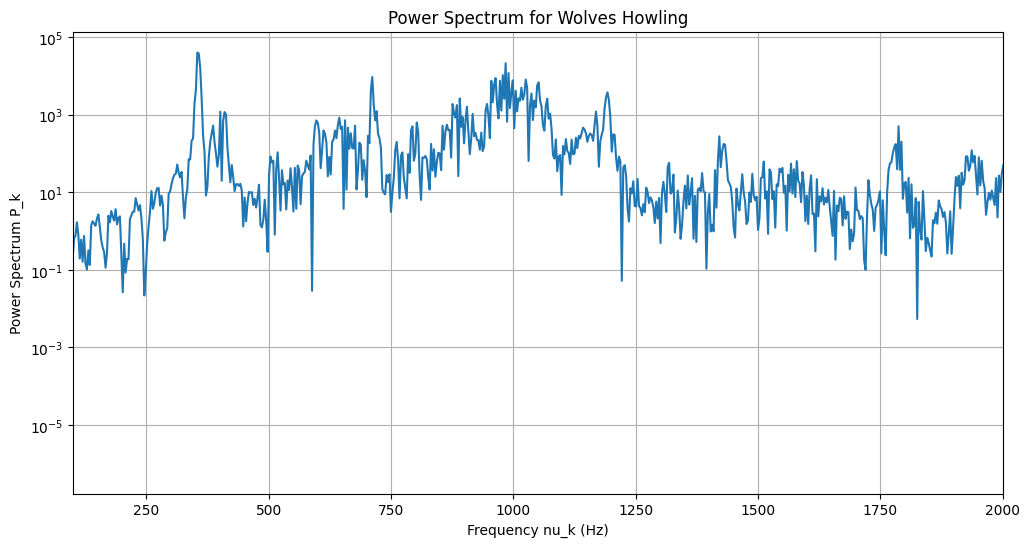

True

In [11]:
# Your code for Part (b) here
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, signal
import urllib.request
import soundfile

path = "https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/blob/main/data/Wolf_howls.ogg?raw=true"
tmp_file = urllib.request.urlretrieve(path)[0]
data, sample_rate = soundfile.read(tmp_file)

#Define DFT function
def DFT(fn):
    # Calculate N automatically from number of samples
    N = len(fn)
    # Initialize empty array for Fourier coefficients
    ck = np.zeros(N, dtype='complex')
    #Define values n = [0,1,2,...,N-1]
    n = np.arange(N)

    #Calculate coefficients ck by looping through k
    for k in range(N):
        ck[k] = 1/N * np.sum(fn * np.exp(-2j * np.pi * k * n / N))

    return ck

#Define FFT functions
def FFT(fn):
    N = len(fn)
    if N % 2 == 0:
        #FFT steps if N is divisible by 2
        gm = fn[::2]
        hm = fn[1::2]
        Gk = FFT(gm)
        Hk = FFT(hm)

        k = np.arange(N // 2)
        factor = np.exp(-2j * np.pi * k / N)

        ck = np.zeros(N, dtype='complex')
        ck[:N // 2] = Gk + factor * Hk
        ck[N // 2:] = Gk - factor * Hk
    else:
        #If N is not divisible by 2, use the DFT function (brute force method for odd N)
        ck = DFT(fn)

    return ck

#Format data
fn = data[:,0]
N = 16384
tn = np.array(range(N))/sample_rate
subset_fn = fn[:N]

#Calculate the Fourier coefficients using FFT function
fft_coeffs = FFT(subset_fn)

#Using brute force method to find the same Fourier coefficients (DFT method)
if N <= 256:
  dft_coeffs = DFT(subset_fn)
else:
  dft_coeffs = fft_coeffs

#Verify both sets of Fourier coefficients are equal
coeffs_equal = np.allclose(fft_coeffs, dft_coeffs)

#Calculate the Fourier frequencies
nu_k = np.fft.fftfreq(N, 1/sample_rate)

#Calculate the power spectrum from the Fourier coefficients(FFT method)
power_spectrum = np.abs(fft_coeffs)**2

#Sort the power spectrum and frequencies for plotting
sort_index = np.argsort(nu_k)
nu_k_sorted = nu_k[sort_index]
Pk_sorted = power_spectrum[sort_index]

#Plotting the power spectrum
plt.figure(figsize=(12, 6))
plt.plot(nu_k_sorted, Pk_sorted)
plt.yscale('log')
plt.xlim([100, 2000])
plt.xlabel('Frequency nu_k (Hz)')
plt.ylabel('Power Spectrum P_k')
plt.title('Power Spectrum for Wolves Howling')
plt.grid(True)
plt.show()

#Should be true, as FFT and DFT methods output equal coefficients
coeffs_equal